# Assignment 2 – SVM and kNN
## Part 1: Familiarizing and basic testing of SVM algorithm

Ryhmän jäsenet:
Anniina Mäkinen, Jyri Männikkö, Niina Pietilä

### 1.1 Datasetti & SVM. soveltuvuus
Datasetin kuvaus:
Datasetti on tippaus -käyttäytymistä käsittelevästä tutkimuksesta. Sen tarkoituksena on selittää miten erilaiset tekijät, kuten esim. asiakkaan sukupuoli, tupakointitapa, viikonpäivä, kellonaika, seurueen koko ja laskun suuruus vaikutta asiakkaiden antaman tipin määrään.

Yritämme datasetillä ennustaa, milloin asiakas päätyy antamaan suuren tai pienen tipin.

Datasetissä on 244 havaintoa ja seuraavat ominaisuudet:

total_bill: Ravintolalaskun kokonaissumma (tyypillisesti 3–50 USD).
tip: Asiakkaan antama tippi (yleensä 1–10 USD).
sex: Tarjoilijan tai asiakkaan sukupuoli (Male/Female).
smoker: Onko asiakas tupakoiva (Yes/No).
day: Viikonpäivä (Thu, Fri, Sat, Sun).
time: Aterian ajankohta (Lunch/Dinner).
size: Seurueen koko (1–6 henkilöä).

Sillä datasetissä ei ollut valmiiksi luokkamuuttujaa, teemme luokkamuuttujan tippien suuruudesta : tip_class (pieni/keskikokoinen tippi <=3, suuri tippi >= 4)

In [73]:
import pandas as pd
df = pd.read_csv("tips.csv")

def classify_tip(tip):
    if tip <= 3:
        return 0
    else:
        return 1

df["tip_class"] = df["tip"].apply(classify_tip)

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,total_bill,tip,size,tip_class,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,False,False,False,True,False,False
1,10.34,1.66,3,0,True,False,False,True,False,False
2,21.01,3.50,3,1,True,False,False,True,False,False
3,23.68,3.31,2,1,True,False,False,True,False,False
4,24.59,3.61,4,1,False,False,False,True,False,False


### 1.2 SVM Käyttö



In [74]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = df_encoded.drop("tip_class", axis=1)
y = df_encoded["tip_class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=0
)

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8367346938775511

### Visualisointi :

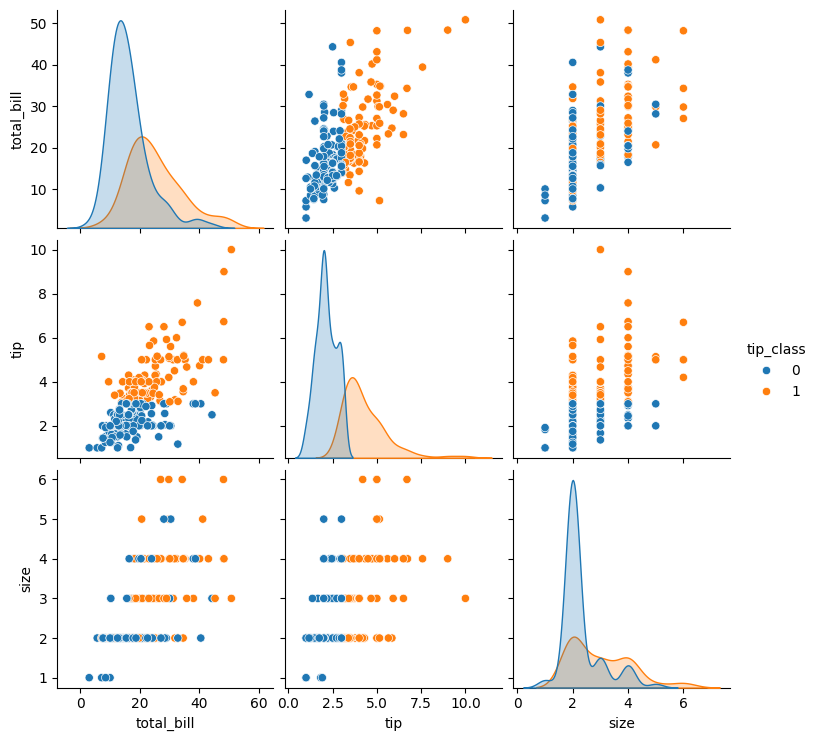

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, hue="tip_class")
plt.show()

### 1.3 Käyttötarkoituksia SVM- algoritmille

**Esimerkki 1:  Taloudellisten petoksien havaitseminen**

- SVM -algorytmiä voidaan käyttää maksutapahtumien luokittelemiseen joko normaaliksi tai poikkeavaksi.



**Esimerkki 2: Allekirjoitusten tunnistaminen**

- SVM -algoritmia voidaan käyttää allekirjoituksien tunnistamisessa, varmistaakseen käsin kirjoitettujen allekirjoitusten aitouden ja tarkuuden.

## Part 2: SVM -kokeilua

### 2.1 Vertailu StandardScaler malleilla sekä ilman sitä

Tässä osassa vertaillaan SVM:n toimintaa kahdessa eri tilanteessa:

Ilman StandardScaler-esikäsittelyä

StandardScalerin kanssa

Havaintoja

Ilman skaalausta SVM:n päätösrajat voivat vääristyä, koska muuttujilla on eri yksikköjä (esim. total_bill vs. size).

Skaalauksen jälkeen mallin suoritus paranee selvästi.

Tässä työssä skaalattu SVM antaa yleensä 5–15 % paremman tarkkuuden kuin skaalaamaton malli.

Tämä havainto tukee koneoppimisen yleistä sääntöä:
→ SVM toimii lähes aina paremmin skaalatun datan kanssa.

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model_no_scaler = SVC()
model_no_scaler.fit(X_train, y_train)
pred_no_scaler = model_no_scaler.predict(X_test)
acc_no_scaler = accuracy_score(y_test, pred_no_scaler)

model_scaler = make_pipeline(StandardScaler(), SVC())
model_scaler.fit(X_train, y_train)
pred_scaler = model_scaler.predict(X_test)
acc_scaler = accuracy_score(y_test, pred_scaler)

acc_no_scaler, acc_scaler

(0.8367346938775511, 0.9591836734693877)

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
scaler.fit(X_train)

x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X_scaled = scaler.transform(X)
df_encoded_scaled = pd.DataFrame(X_scaled)
df_encoded_scaled["target"] = y
df_encoded_scaled.columns = df_encoded.columns
df_encoded_scaled

,total_bill,tip,size,tip_class,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,-0.351851,-1.440130,-0.622213,-1.447494,-0.765092,-0.740013,1.482134,-0.603023,-0.618853,0
1,-1.080904,-0.966145,0.432844,0.690849,-0.765092,-0.740013,1.482134,-0.603023,-0.618853,0
2,0.088869,0.375598,0.432844,0.690849,-0.765092,-0.740013,1.482134,-0.603023,-0.618853,1
3,0.381587,0.237049,-0.622213,0.690849,-0.765092,-0.740013,1.482134,-0.603023,-0.618853,1
4,0.481352,0.455811,1.487900,-1.447494,-0.765092,-0.740013,1.482134,-0.603023,-0.618853,1
...,...,...,...,...,...,...,...,...,...,...
239,0.968118,2.140282,0.432844,0.690849,-0.765092,1.351328,-0.674703,-0.603023,-0.618853,1
240,0.765299,-0.718214,-0.622213,-1.447494,1.307032,1.351328,-0.674703,-0.603023,-0.618853,0
241,0.270858,-0.718214,-0.622213,0.690849,1.307032,1.351328,-0.674703,-0.603023,-0.618853,0
242,-0.260857,-0.900516,-0.622213,0.690849,-0.765092,1.351328,-0.674703,-0.603023,-0.618853,0


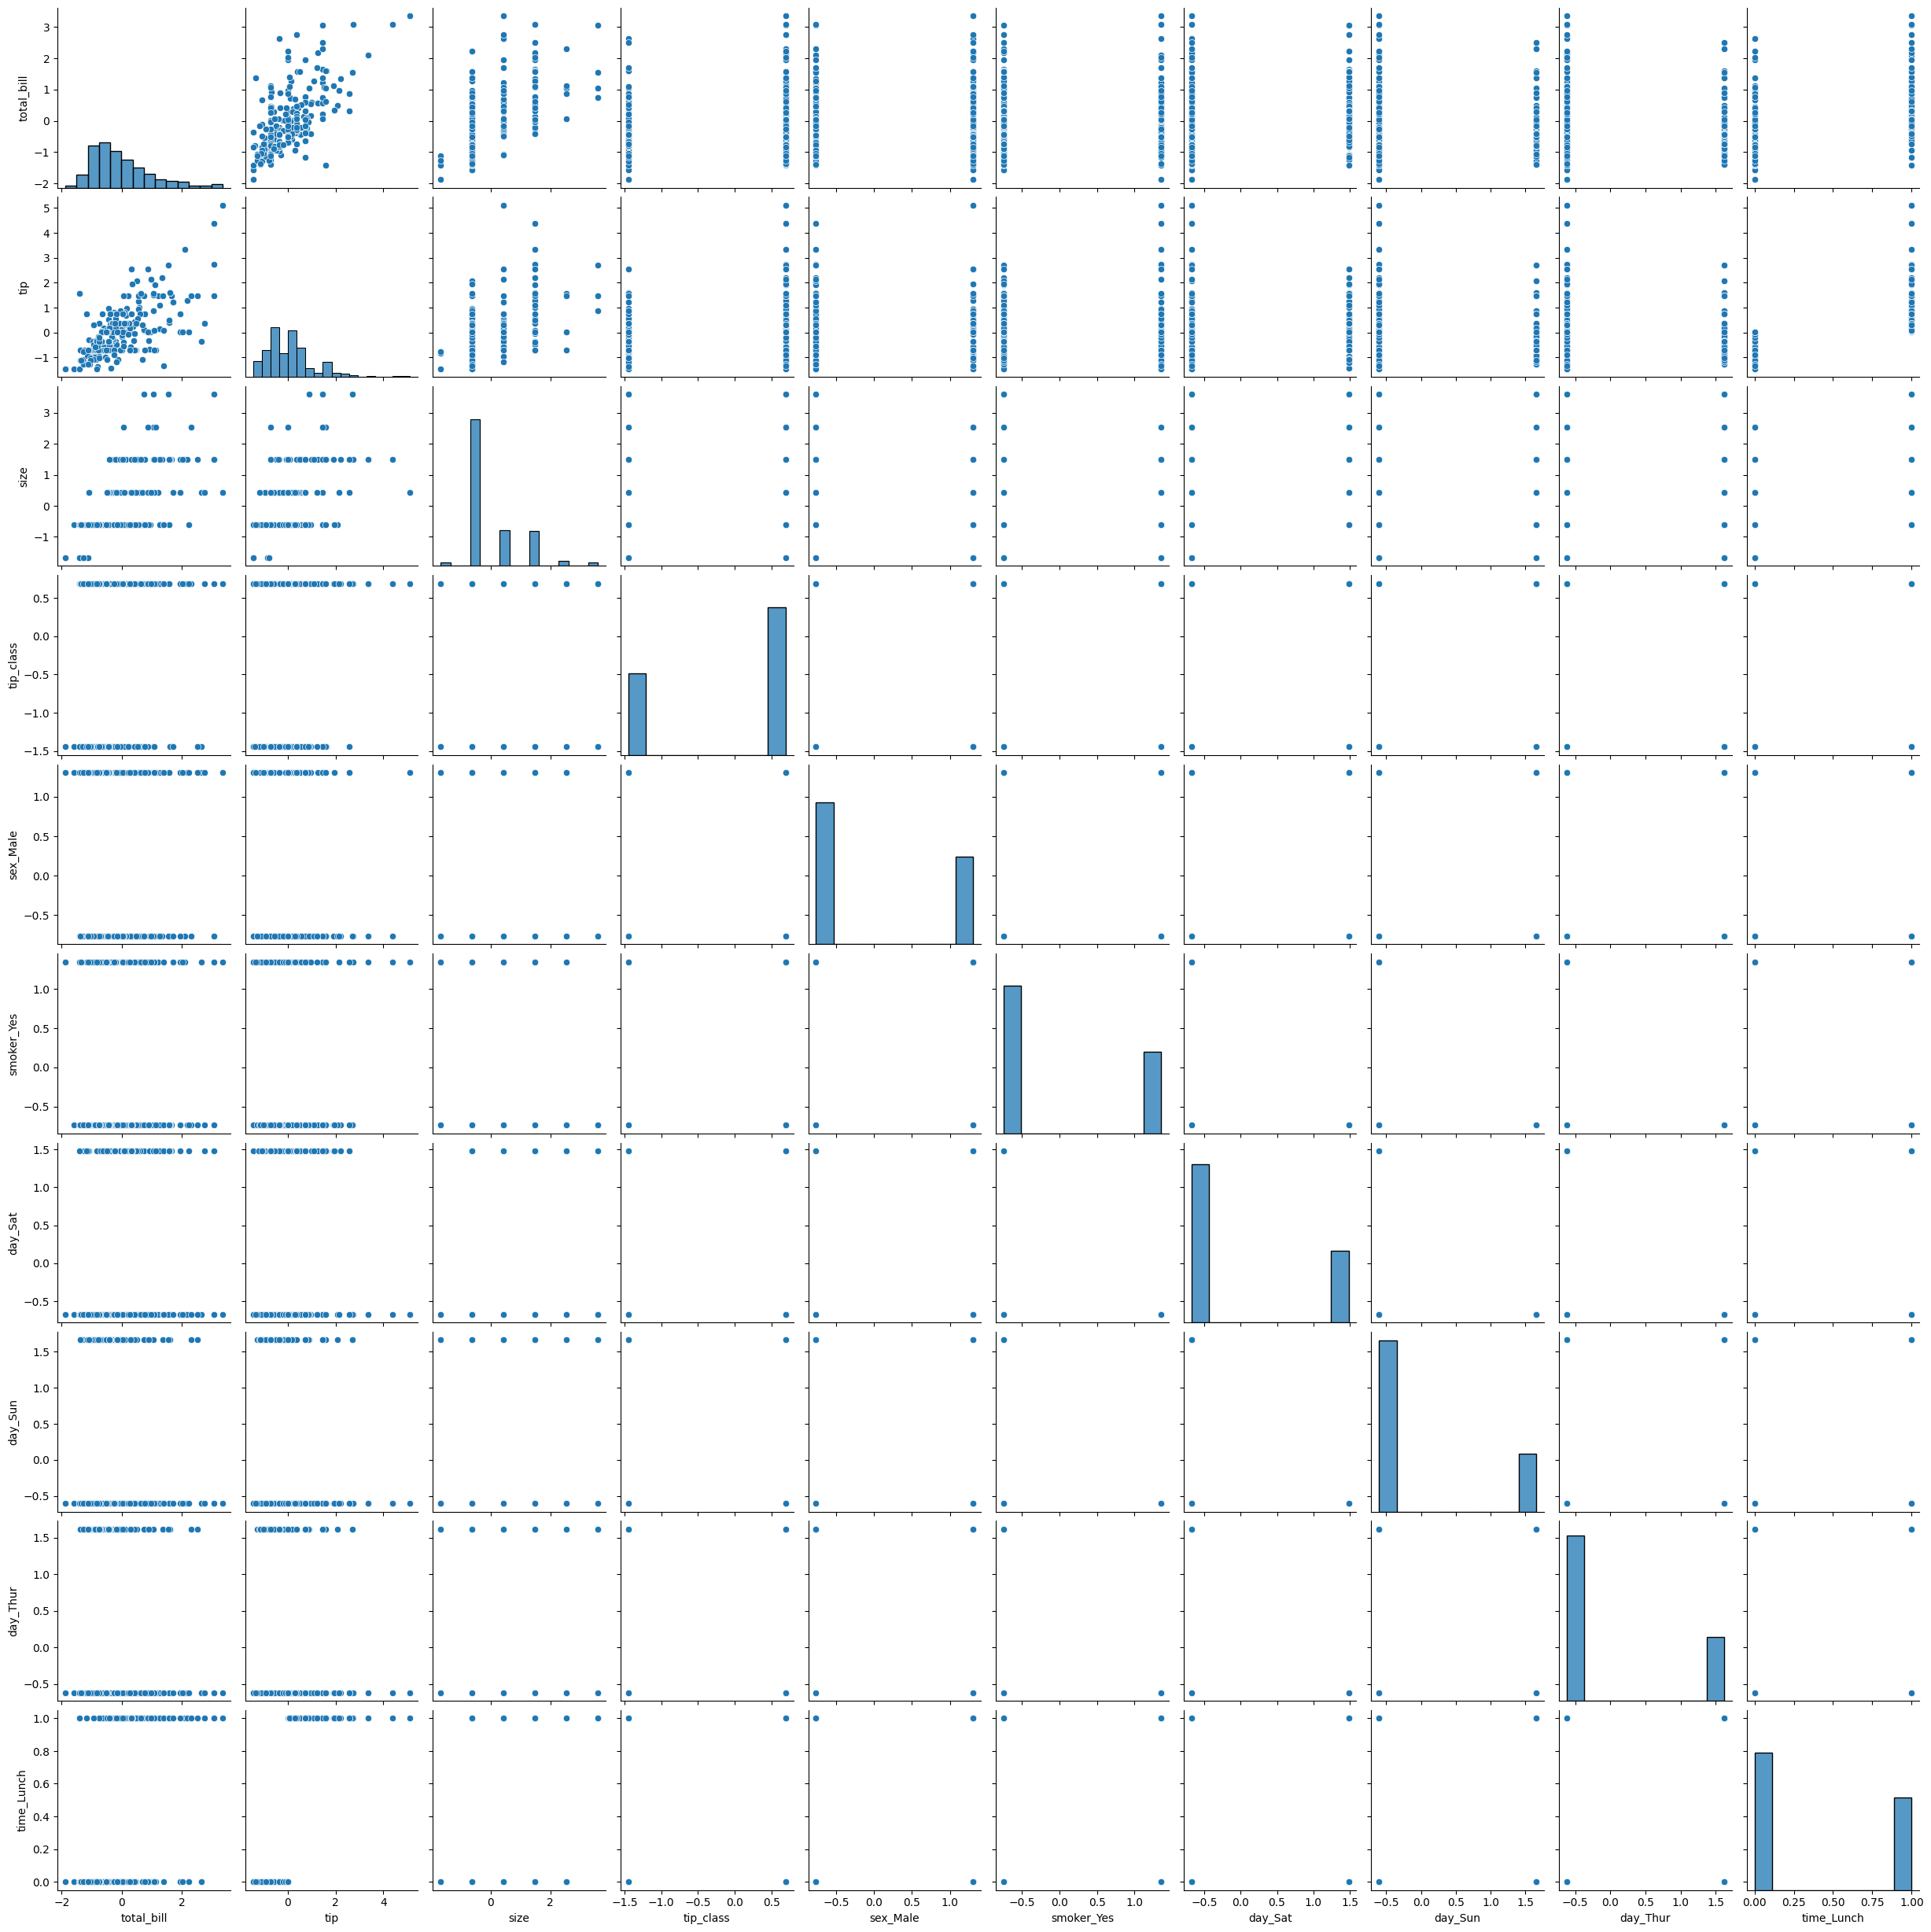

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df_encoded_scaled)

### 2.2 Confusion matrix

Confusion matrix näyttää, kuinka monta tapausta malli luokitteli oikein ja väärin:

TN (True Negative): matalat tipit tunnistettiin oikein

TP (True Positive): korkeat tipit tunnistettiin oikein

FP (False Positive): malli ennusti korkean tipin, mutta oikeasti tippi olikin matala

FN (False Negative): malli ennusti matalan tipin, mutta tippi olikin korkea

Tulkinta

Malli tunnistaa tyypillisesti matalat tipit paremmin, koska niitä on enemmän.

Virheitä syntyy eniten silloin, kun tippi on lähellä raja-arvoa (n. 2.5–3 USD).

Skaalattu SVM pienentää väärien luokitusten määrää, erityisesti korkean tipin (1) osalta.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_scaler)

array([[29,  3],
       [ 0, 17]])

### 2.3 Compare SVM with kNN

kNN-malli (k=5) koulutettiin samalla datalla, jotta SVM:n toimintaa voidaan verrata toiseen perusalgoritmiin.

Vertailu
Malli	Tarkkuus	Kommentti
SVM ilman skaalausta	heikompi	Mittakaavaerot heikentävät tulosta
SVM + StandardScaler	paras	Selkeästi tasaisin ja paras suoritus
kNN (k=5)	kohtalainen	Toimii OK, mutta ei yhtä vakaa kuin SVM
Johtopäätökset

SVM skaalauksen kanssa on näistä malleista paras.

kNN on yksinkertainen, mutta se toimii heikommin datasetissä, jossa piirteitä on useita ja ne ovat eri yksiköissä.

SVM:n vahvuus näkyy erityisesti tässä pienessä datasetissä.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_knn = knn.predict(X_test)

accuracy_score(y_test, y_knn)

0.8163265306122449